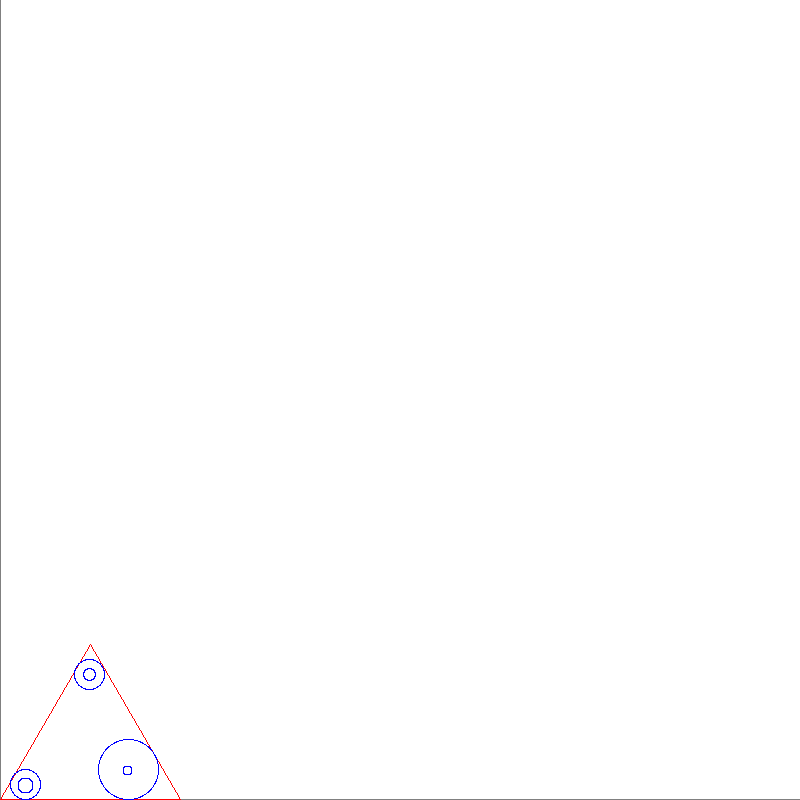

Triangle number 1:
All three stoppers will fit in the triangular space



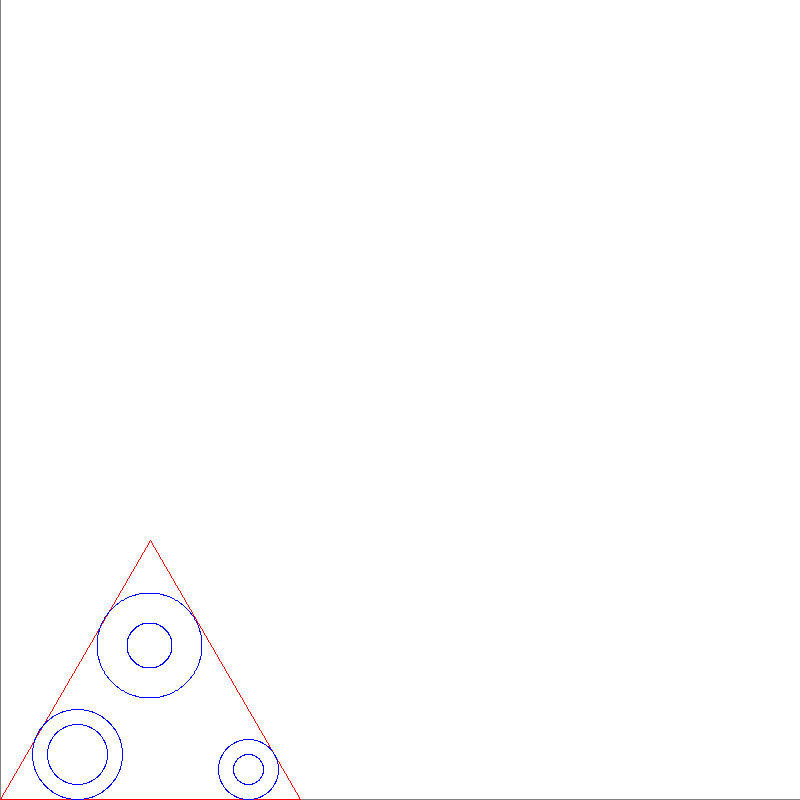

Triangle number 2:
All three stoppers will fit in the triangular space



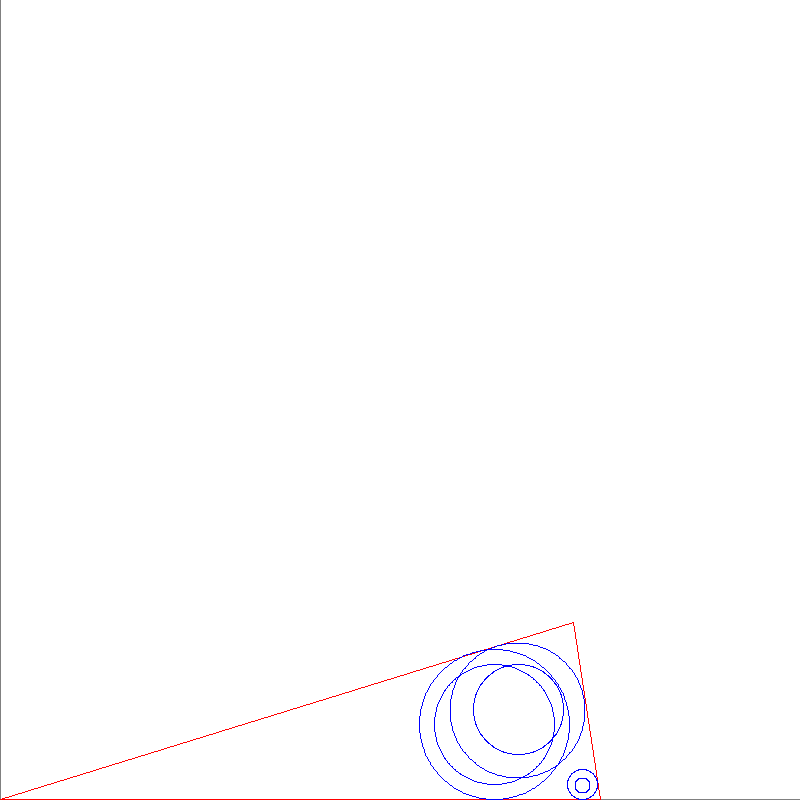

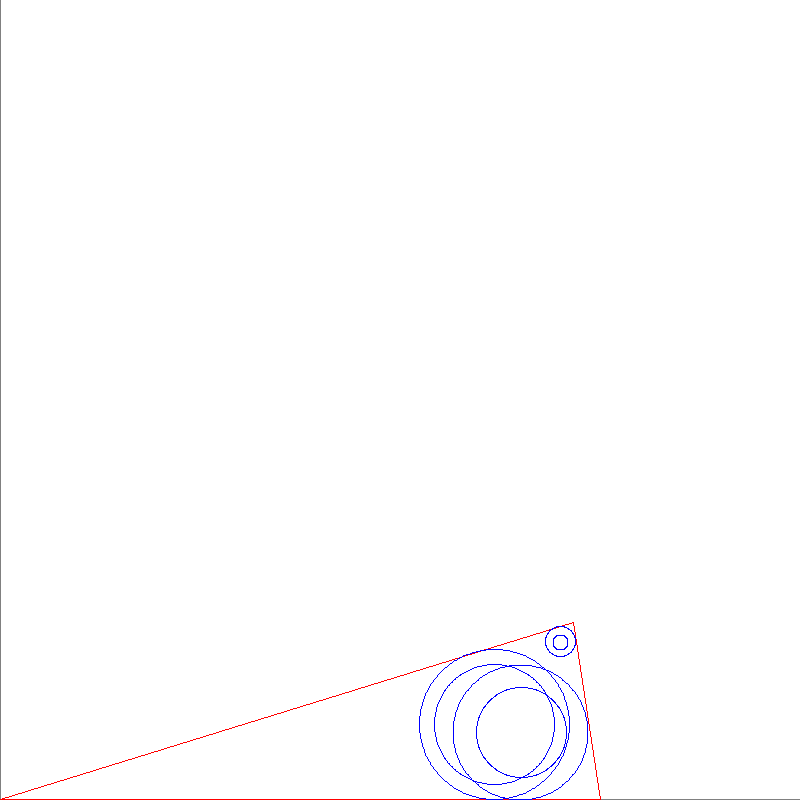

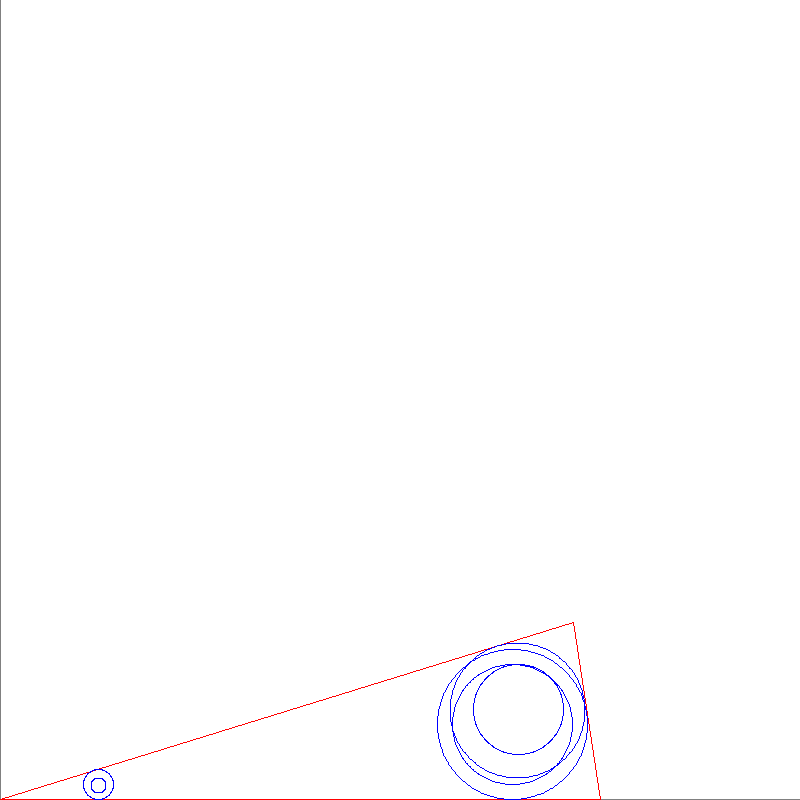

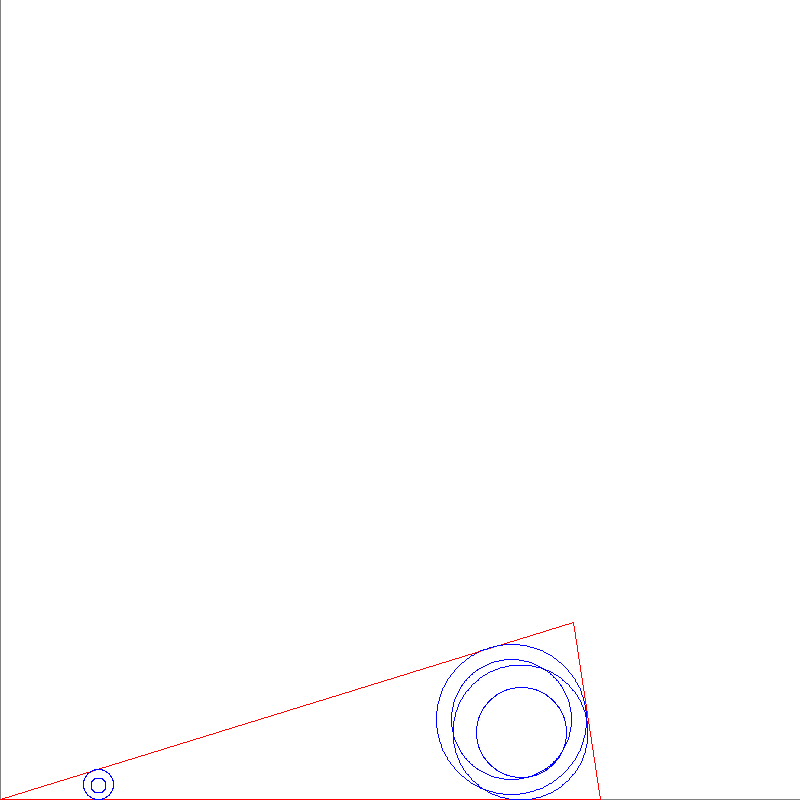

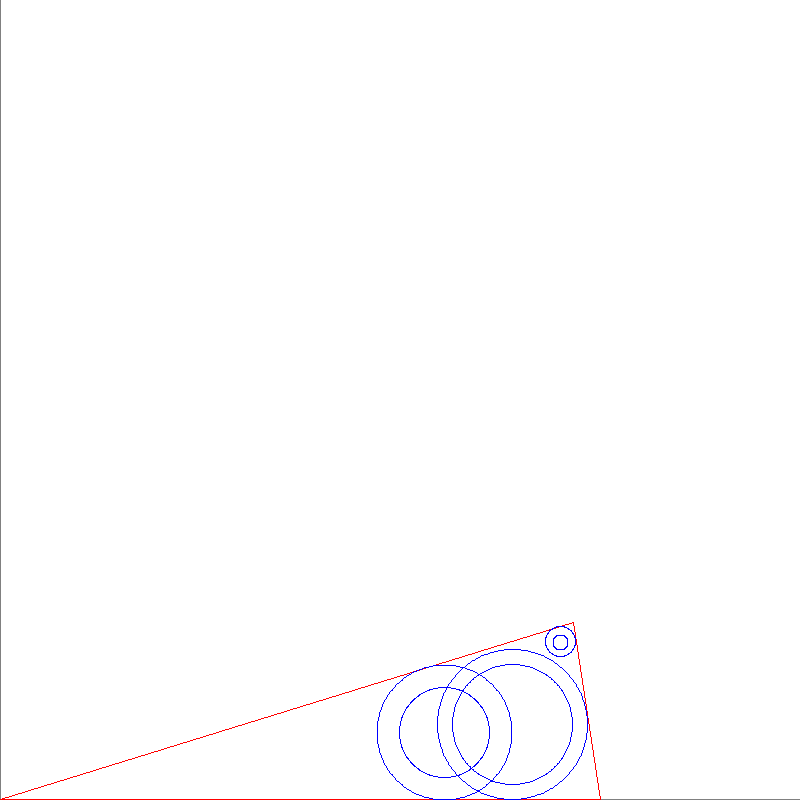

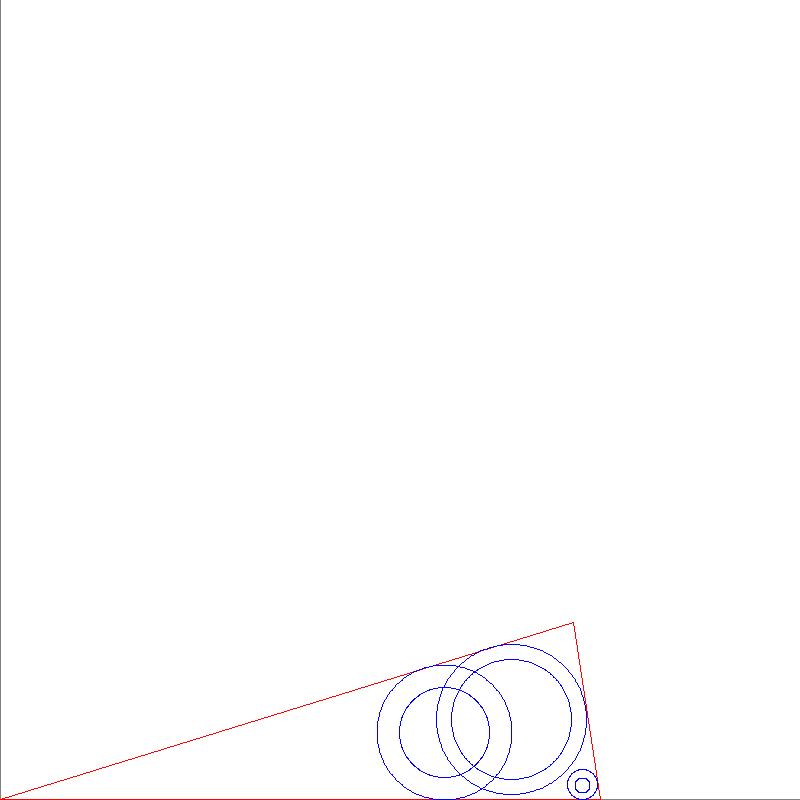

Triangle number 3:
Stoppers will not fit in the triangular space



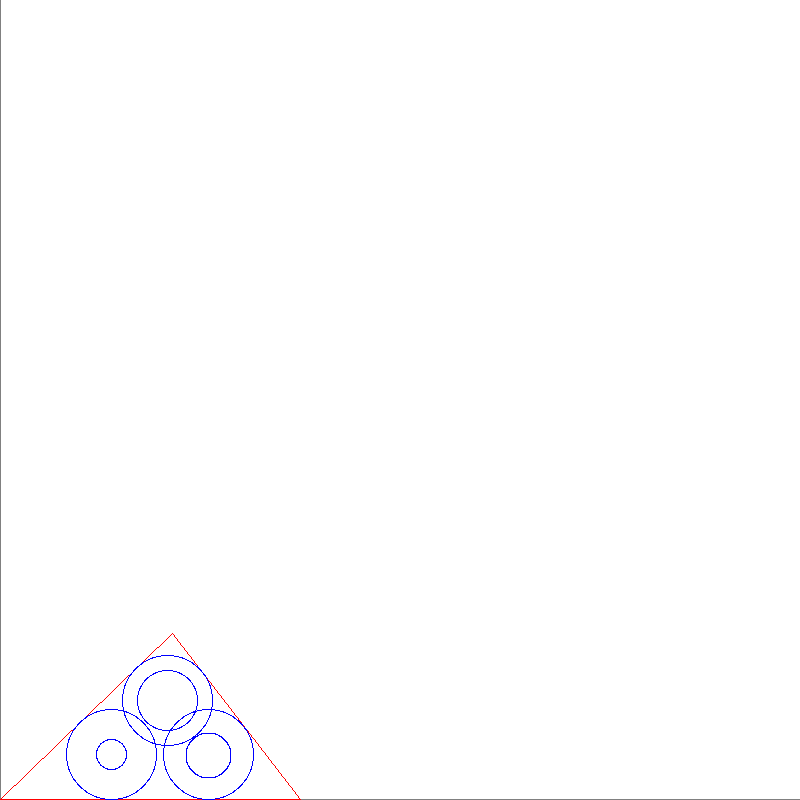

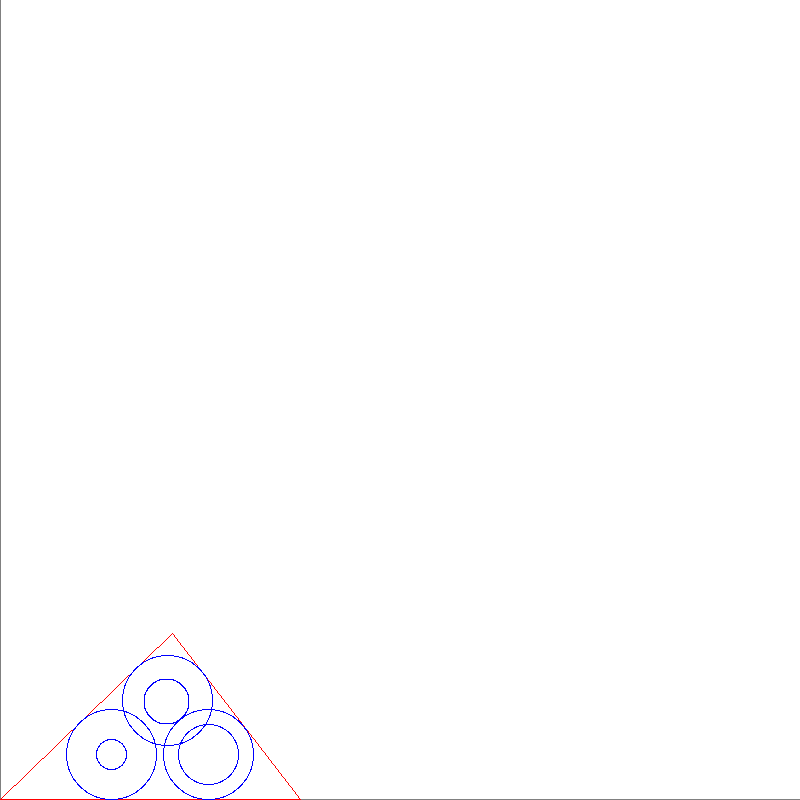

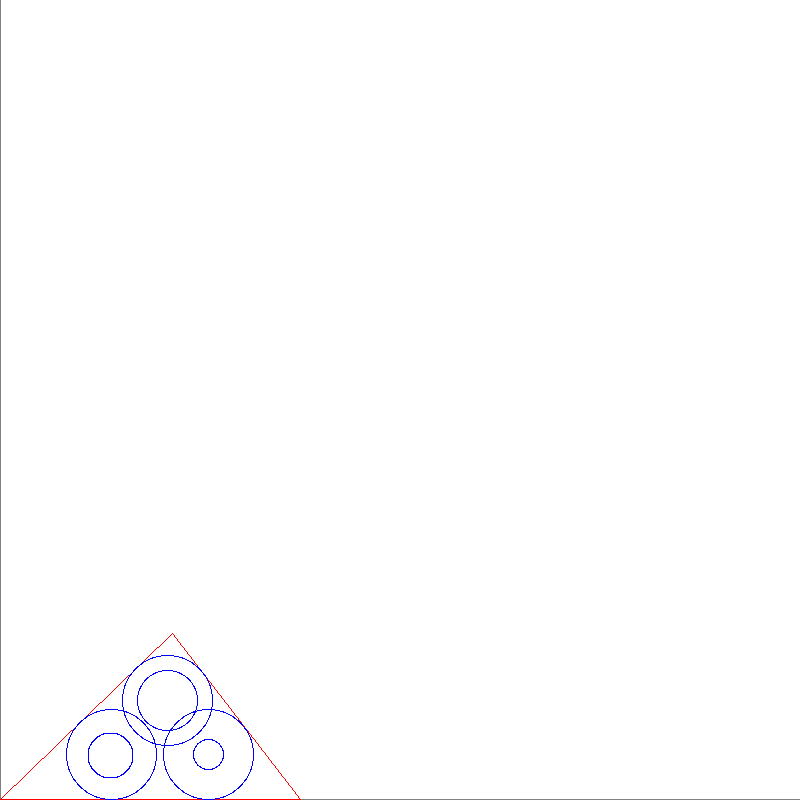

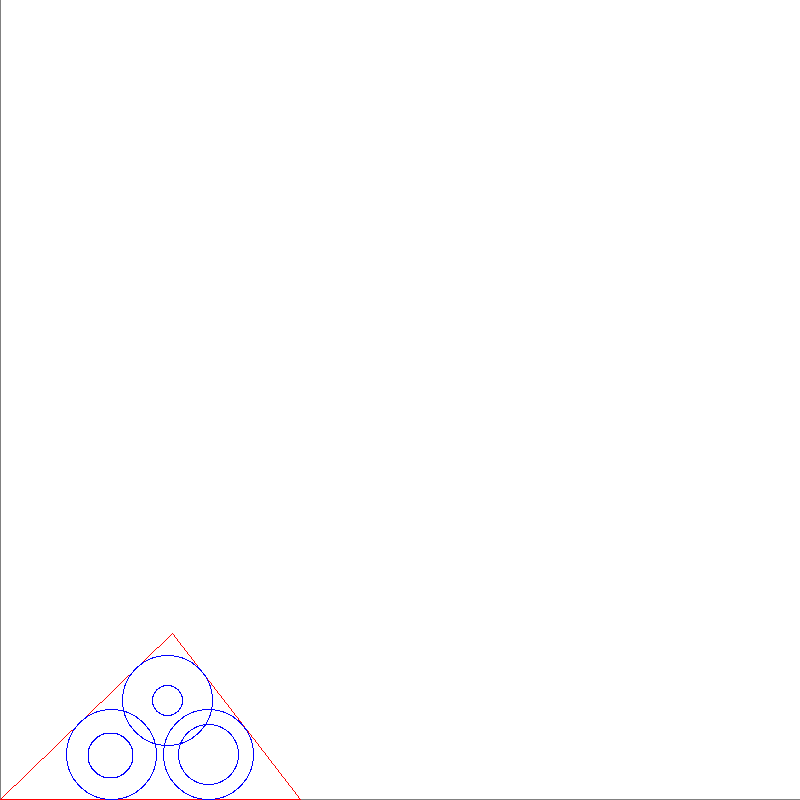

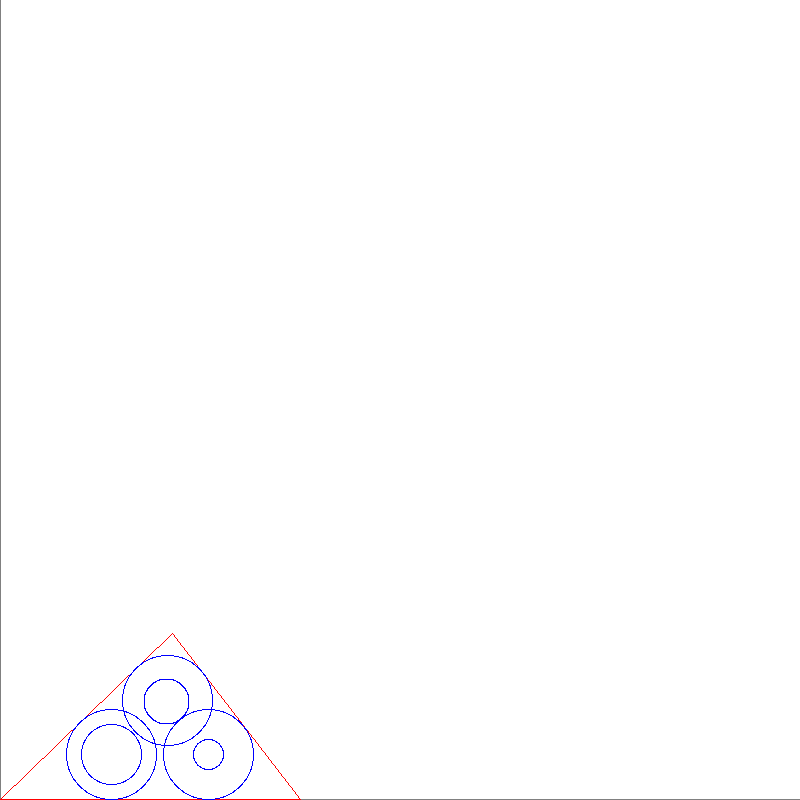

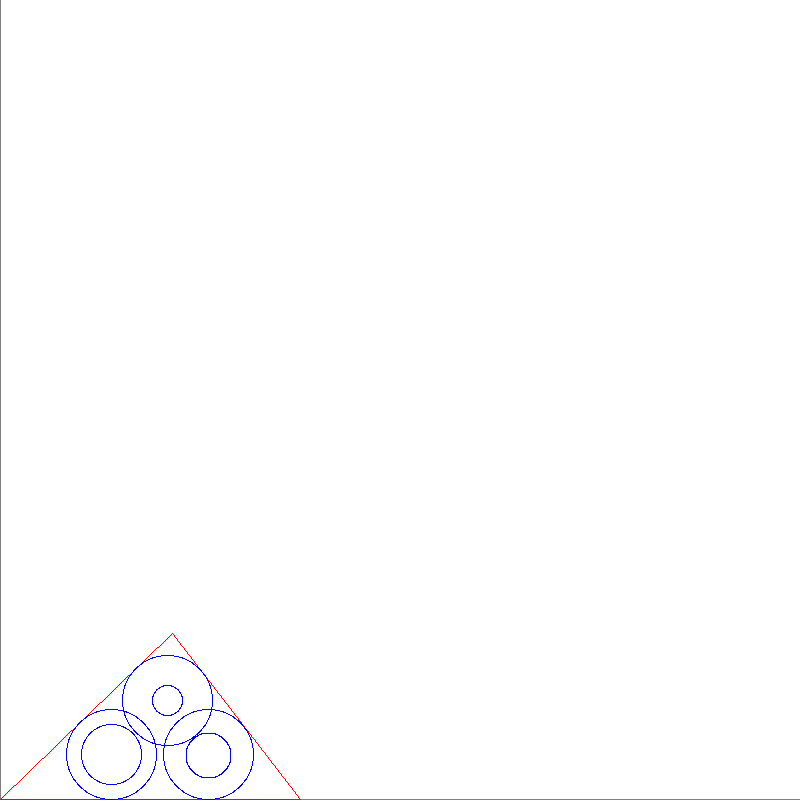

Triangle number 4:
All three stoppers will fit in the triangular space



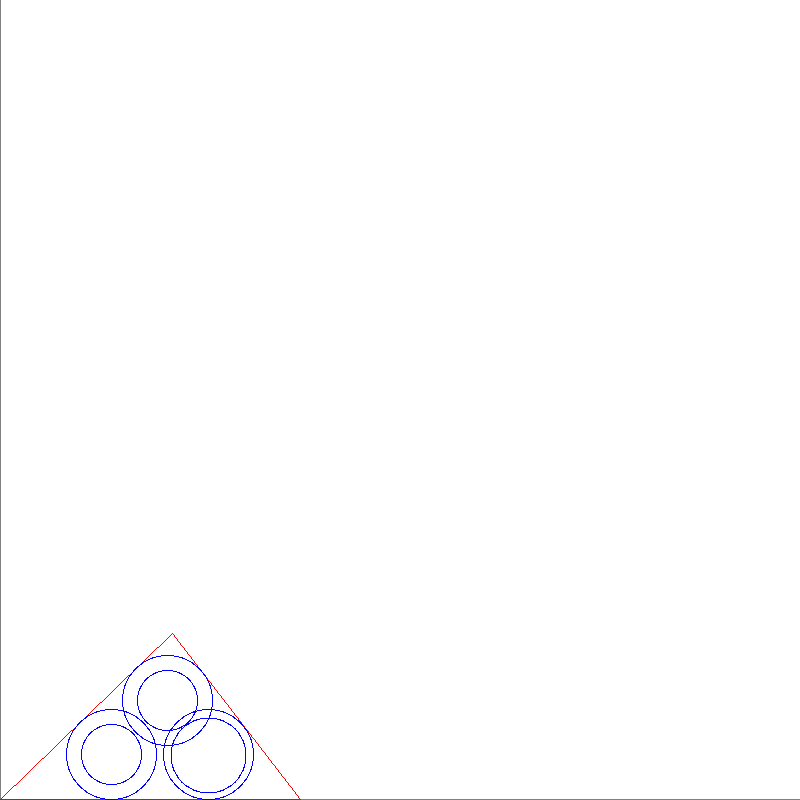

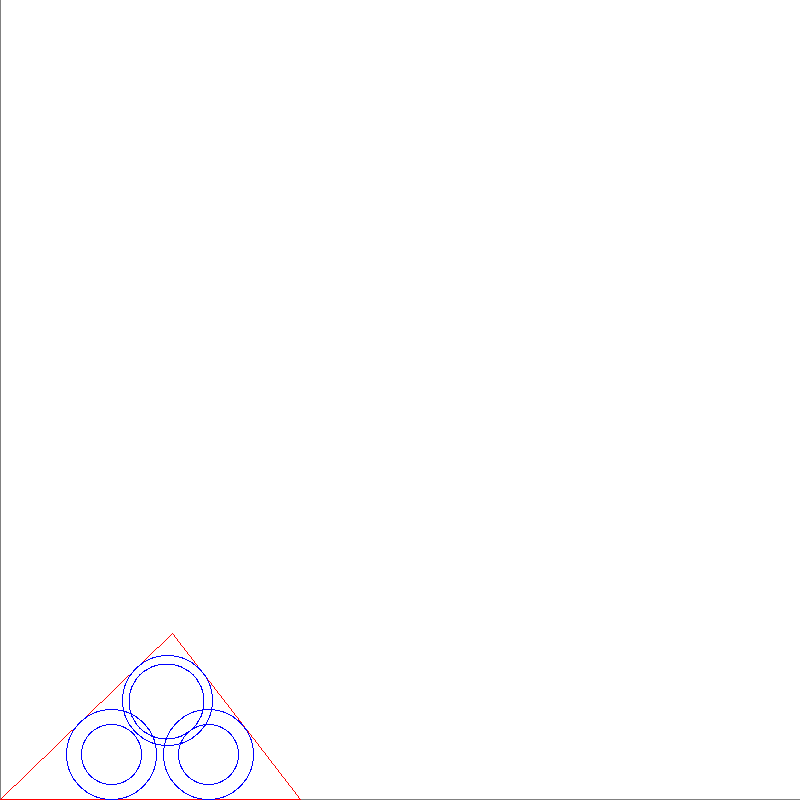

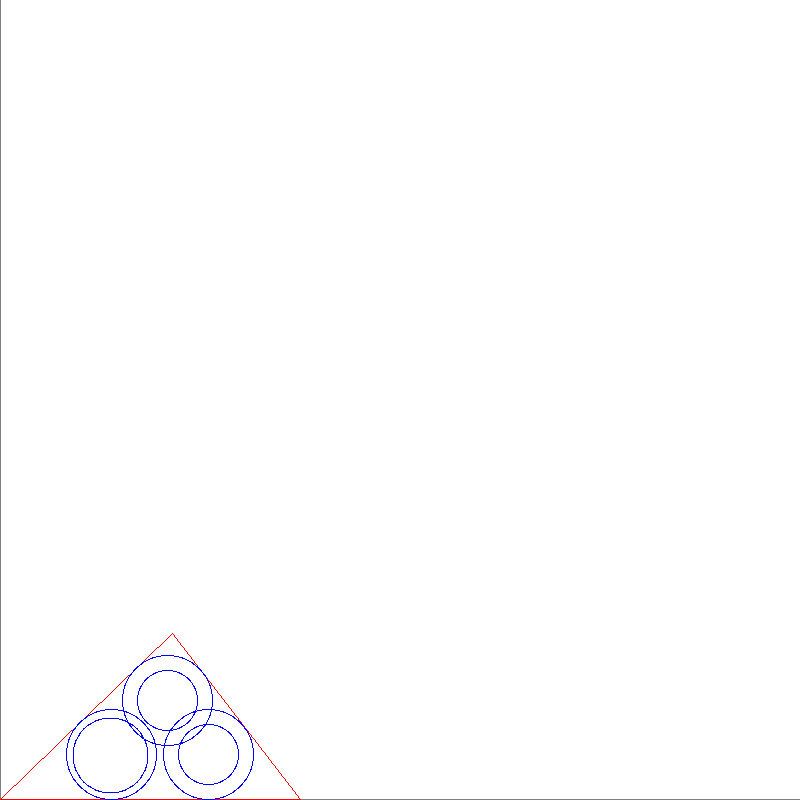

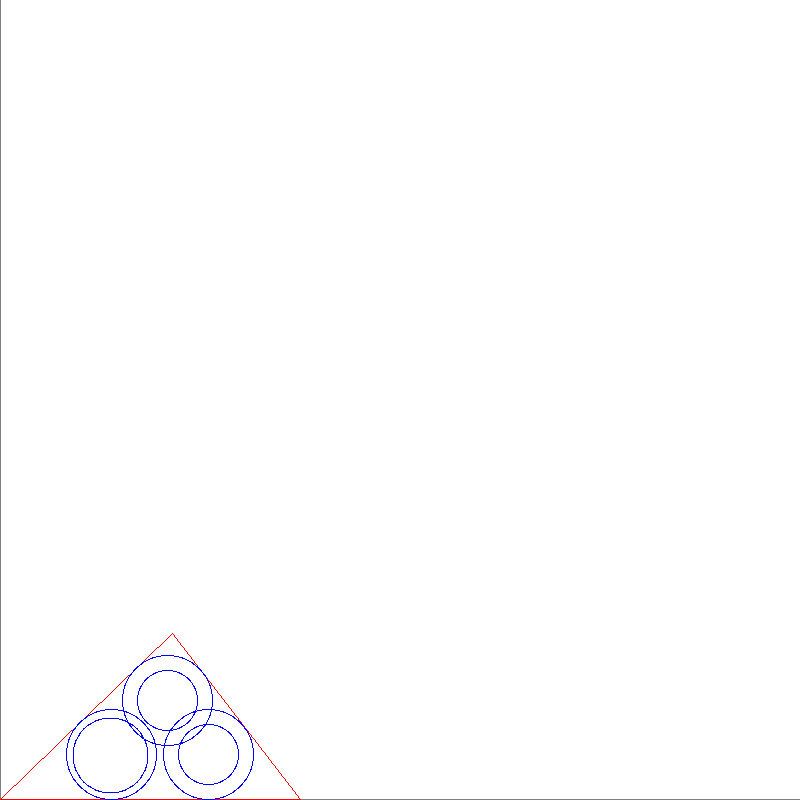

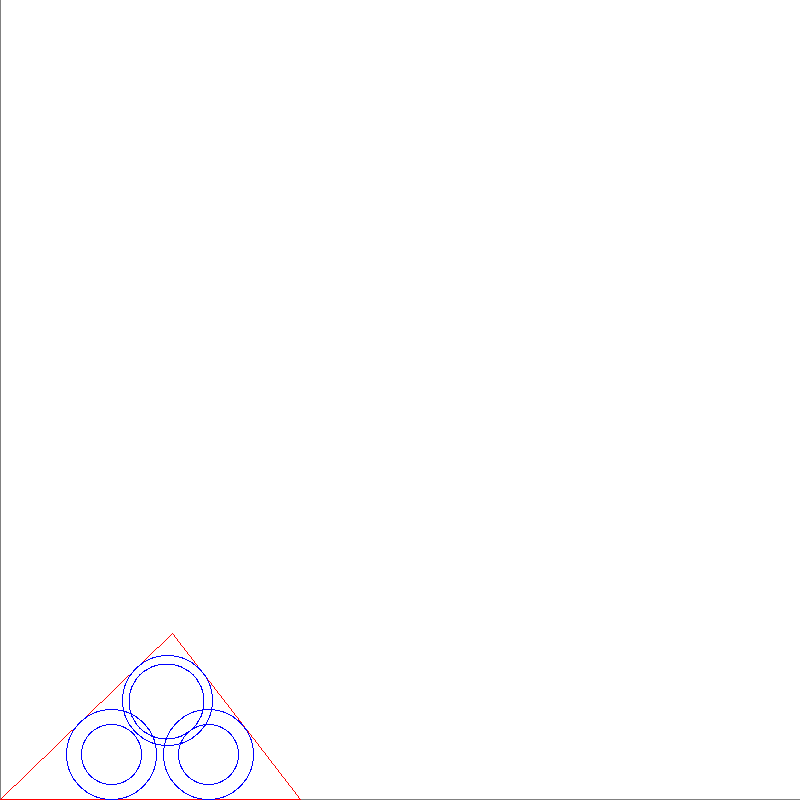

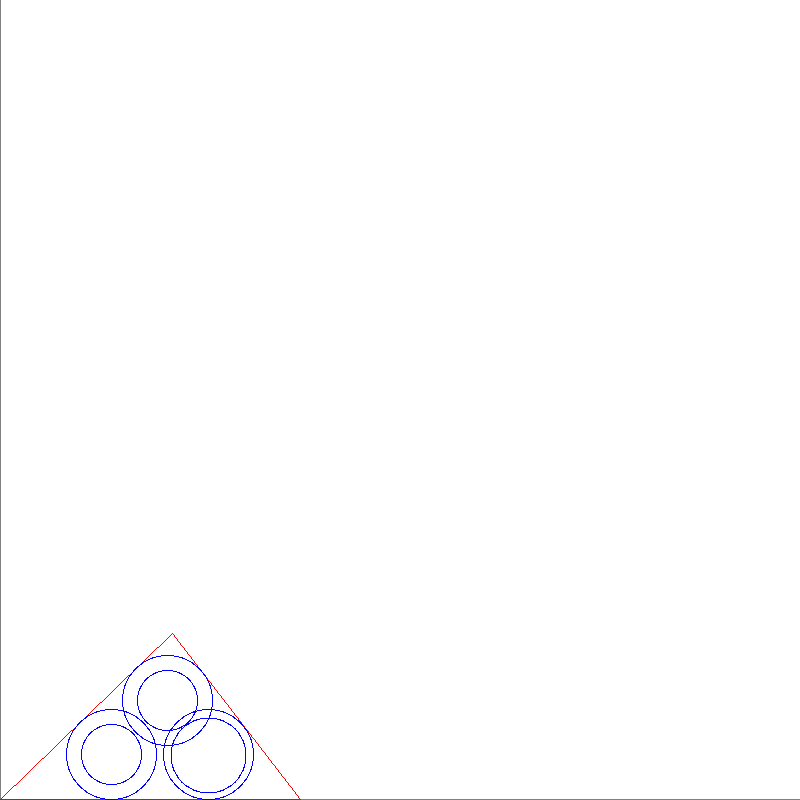

Triangle number 5:
Stoppers will not fit in the triangular space



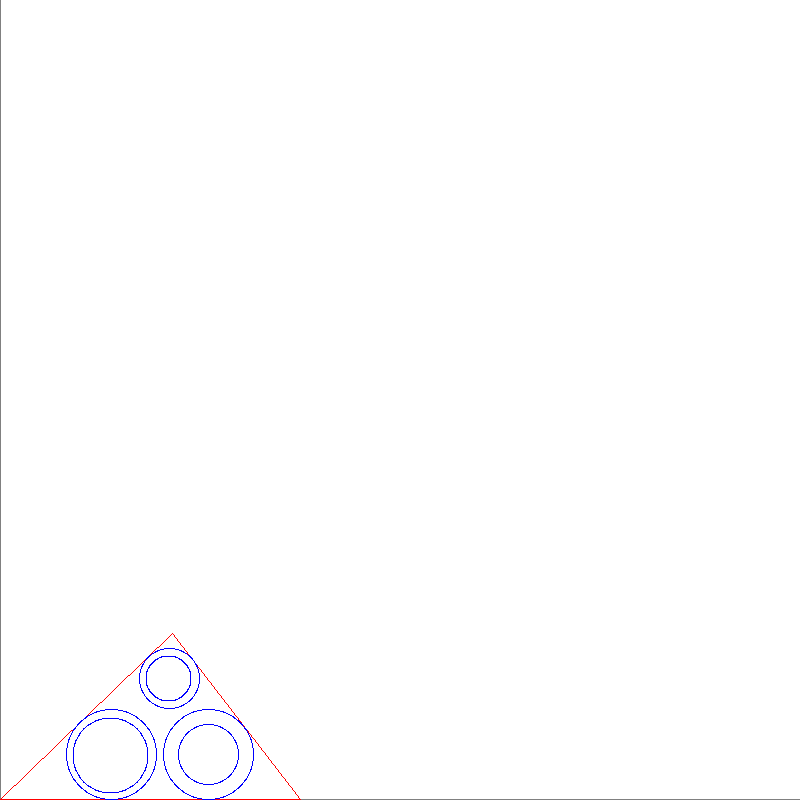

Triangle number 6:
All three stoppers will fit in the triangular space


In [1]:
import math
import sys
import PIL
import collections
from PIL import Image, ImageDraw

EPSILON = 0.0
PI = 3.14159265358979

class GridPoint:
    def __init__(self, x, y):
        self.x = x
        self.y = y

stopper_list = [[0.0,0.0],[0.0,0.0],[0.0,0.0]]
triangle = [0,0,0]
vertices = [GridPoint(x=0.0, y=0.0),GridPoint(x=0.0, y=0.0),GridPoint(x=0.0, y=0.0)]
angles = [0.0, 0.0, 0.0]

possibilities = [ [0, 1, 2], [0, 2, 1], [1, 0, 2], [1, 2, 0], [2, 0, 1], [2, 1, 0]]

count = 1

with open('uva823.in', 'r') as infile:
    while True:
        nums = list(map(float, infile.readline().split()))
        if nums[0] == 0:
            break
        triangle[0] = nums[0]
        triangle[1] = nums[1]
        triangle[2] = nums[2]
        stopper_list[0][0] = nums[3]
        stopper_list[0][1] = nums[4]
        stopper_list[1][0] = nums[5]
        stopper_list[1][1] = nums[6]
        stopper_list[2][0] = nums[7]
        stopper_list[2][1] = nums[8]

        if count != 1: 
            print()
        triangle.sort()
        if triangle[0] == triangle[1] and triangle[1] == triangle[2]:
            angles[0] = angles[1] = angles[2] = 60.0
        else:
            angles[0] = math.acos(((triangle[0] * triangle[0]) + triangle[1] * triangle[1] - triangle[2] * triangle[2])/(2.0 * triangle[0] * triangle[1]))
            angles[1] = math.asin(triangle[0] / triangle[2] * math.sin(angles[0])) * (180.0 / PI)
            angles[0] = angles[0] * (180.0 / PI)
            angles[2] = 180.0 - (angles[0] + angles[1])
            angles.sort()
        ##vertices 0x and 0y are default 0
        vertices[1].x = triangle[2]
        ##vertices 1y is default 0
        vertices[2].x = math.cos(angles[0] * PI/180.0) * triangle[1]
        vertices[2].y = math.sin(angles[0] * PI/180.0) * triangle[1]
        
        index = 0
        if stopper_list[0][1] == stopper_list[1][1] and stopper_list[1][1] == stopper_list[2][1]:
            vals = [stopper_list[0][0],stopper_list[1][0],stopper_list[2][0]]
            index = vals.index(min(vals))
        else:
            vals = [stopper_list[0][0],stopper_list[1][0],stopper_list[2][0]]
            index = vals.index(max(vals))
            
        stopper_list[index], stopper_list[0] = stopper_list[0], stopper_list[index]
        
        possible = True
        good = False;
        
        tri_perim = (triangle[0] + triangle[1] + triangle[2])
        tri_perim_over_2 = tri_perim / 2.0
        tri_area = math.sqrt(tri_perim_over_2 * (tri_perim_over_2 - triangle[0]) * (tri_perim_over_2 - triangle[1]) * (tri_perim_over_2 - triangle[2]))
        max_rad = (2.0 * tri_area) / tri_perim
        
        for j in range(3):
            if stopper_list[j][1]/2.0 > max_rad:
                possible = false
                break
        if possible:
            for i in range(6):
                a = GridPoint(0.0,0.0)
                b = GridPoint(0.0,0.0)
                c = GridPoint(0.0,0.0)
                
                a.x = (stopper_list[possibilities[i][0]][1]/2.0)/math.tan((angles[0]/2.0) * PI / 180.0)
                a.y = (stopper_list[possibilities[i][0]][1]/2.0)
                b.x = triangle[2] - ((stopper_list[possibilities[i][1]][1]/2.0)/math.tan((angles[1]/2.0) * PI / 180.0))
                b.y = (stopper_list[possibilities[i][1]][1]/2.0)
                tmp_cx = (stopper_list[possibilities[i][2]][1]/2.0)/math.tan((angles[2]/2.0) * PI / 180.0)
                tmp_cy = (stopper_list[possibilities[i][2]][1]/2.0)
                rotation_angle = 180.0 + (90.0 - (math.acos(vertices[2].y/triangle[1]) * 180.0/PI))
                c.x = ((tmp_cx) * math.cos((rotation_angle) * PI / 180.0)) - ((tmp_cy) * math.sin((rotation_angle) * PI/180.0)) + vertices[2].x
                c.y = ((tmp_cy) * math.cos((rotation_angle) * PI / 180.0)) + ((tmp_cx) * math.sin((rotation_angle) * PI/180.0)) + vertices[2].y
            
                base = Image.new('RGB',(800, 800),(255,255,255))
                draw = ImageDraw.Draw(base)
                draw.line([(0,0), (799, 0)], fill=(128,128,128))
                draw.line([(0,0), (0, 799)], fill=(128,128,128))
                
                draw.polygon([(30.0 * vertices[0].x, 30.0 * vertices[0].y), (30.0 * vertices[1].x, 30.0 * vertices[1].y), (30.0 * vertices[2].x, 30.0 * vertices[2].y)], outline=255)
                draw.ellipse((30.0 * (a.x-(stopper_list[possibilities[i][0]][1]/2.0)), 30.0 * (a.y-(stopper_list[possibilities[i][0]][1]/2.0)), 30.0 * (a.x +(stopper_list[possibilities[i][0]][1]/2.0)), 30.0 * (a.y+(stopper_list[possibilities[i][0]][1]/2.0))), outline=(0,0,255))
                draw.ellipse((30.0 * (b.x-(stopper_list[possibilities[i][1]][1]/2.0)), 30.0 * (b.y-(stopper_list[possibilities[i][1]][1]/2.0)), 30.0 * (b.x +(stopper_list[possibilities[i][1]][1]/2.0)), 30.0 * (b.y+(stopper_list[possibilities[i][1]][1]/2.0))), outline=(0,0,255))
                draw.ellipse((30.0 * (c.x-(stopper_list[possibilities[i][2]][1]/2.0)), 30.0 * (c.y-(stopper_list[possibilities[i][2]][1]/2.0)), 30.0 * (c.x +(stopper_list[possibilities[i][2]][1]/2.0)), 30.0 * (c.y+(stopper_list[possibilities[i][2]][1]/2.0))), outline=(0,0,255))
                
                draw.ellipse((30.0 * (a.x-(stopper_list[possibilities[i][0]][0]/2.0)), 30.0 * (a.y-(stopper_list[possibilities[i][0]][0]/2.0)), 30.0 * (a.x +(stopper_list[possibilities[i][0]][0]/2.0)), 30.0 * (a.y+(stopper_list[possibilities[i][0]][0]/2.0))), outline=(0,0,255))
                draw.ellipse((30.0 * (b.x-(stopper_list[possibilities[i][1]][0]/2.0)), 30.0 * (b.y-(stopper_list[possibilities[i][1]][0]/2.0)), 30.0 * (b.x +(stopper_list[possibilities[i][1]][0]/2.0)), 30.0 * (b.y+(stopper_list[possibilities[i][1]][0]/2.0))), outline=(0,0,255))
                draw.ellipse((30.0 * (c.x-(stopper_list[possibilities[i][2]][0]/2.0)), 30.0 * (c.y-(stopper_list[possibilities[i][2]][0]/2.0)), 30.0 * (c.x +(stopper_list[possibilities[i][2]][0]/2.0)), 30.0 * (c.y+(stopper_list[possibilities[i][2]][0]/2.0))), outline=(0,0,255))
                base = base.transpose(PIL.Image.FLIP_TOP_BOTTOM)
                
                display(base)
                tmp_lhs = tmp_rhs = 0.0

                tmp_index_1 = tmp_index_2 = 1
                if possibilities[i][0] == 0:
                    tmp_index_1 = 0
                elif possibilities[i][1] == 0:
                    tmp_index_2 = 0
                tmp_lhs = math.sqrt(math.pow(b.x - a.x,2.0) + math.pow(b.y - a.y,2.0))
                tmp_rhs = stopper_list[possibilities[i][0]][tmp_index_1]/2.0 + stopper_list[possibilities[i][1]][tmp_index_2]/2.0
                if tmp_lhs <= (tmp_rhs + EPSILON):
                    continue;

                tmp_index_1 = tmp_index_2 = 1
                if possibilities[i][1] == 0:
                    tmp_index_1 = 0
                elif possibilities[i][2] == 0:
                    tmp_index_2 = 0
                tmp_lhs = math.sqrt(math.pow(c.x - b.x,2.0) + math.pow(c.y - b.y,2.0))
                tmp_rhs = stopper_list[possibilities[i][1]][tmp_index_1]/2.0 + stopper_list[possibilities[i][2]][tmp_index_2]/2.0
                if tmp_lhs <= (tmp_rhs + EPSILON):
                    continue;

                tmp_index_1 = tmp_index_2 = 1
                if possibilities[i][2] == 0:
                    tmp_index_1 = 0
                elif possibilities[i][0] == 0:
                    tmp_index_2 = 0
                tmp_lhs = math.sqrt(math.pow(a.x - c.x,2.0) + math.pow(a.y - c.y,2.0))
                tmp_rhs = stopper_list[possibilities[i][2]][tmp_index_1]/2.0 + stopper_list[possibilities[i][0]][tmp_index_2]/2.0
                if tmp_lhs <= (tmp_rhs + EPSILON):
                    continue;

                tmp_index_1 = tmp_index_2 = 0
                if possibilities[i][0] == 0:
                    tmp_index_1 = 1
                elif possibilities[i][1] == 0:
                    tmp_index_2 = 1
                tmp_lhs = math.sqrt(math.pow(b.x - a.x,2.0) + math.pow(b.y - a.y,2.0))
                tmp_rhs = stopper_list[possibilities[i][0]][tmp_index_1]/2.0 + stopper_list[possibilities[i][1]][tmp_index_2]/2.0
                if tmp_lhs <= (tmp_rhs + EPSILON):
                    continue;

                tmp_index_1 = tmp_index_2 = 0
                if possibilities[i][1] == 0:
                    tmp_index_1 = 1
                elif possibilities[i][2] == 0:
                    tmp_index_2 = 1
                tmp_lhs = math.sqrt(math.pow(c.x - b.x,2.0) + math.pow(c.y - b.y,2.0))
                tmp_rhs = stopper_list[possibilities[i][1]][tmp_index_1]/2.0 + stopper_list[possibilities[i][2]][tmp_index_2]/2.0
                if tmp_lhs <= (tmp_rhs + EPSILON):
                    continue;

                tmp_index_1 = tmp_index_2 = 0
                if possibilities[i][2] == 0:
                    tmp_index_1 = 1
                elif possibilities[i][0] == 0:
                    tmp_index_2 = 1
                tmp_lhs = math.sqrt(math.pow(a.x - c.x,2.0) + math.pow(a.y - c.y,2.0))
                tmp_rhs = stopper_list[possibilities[i][2]][tmp_index_1]/2.0 + stopper_list[possibilities[i][0]][tmp_index_2]/2.0
                if tmp_lhs <= (tmp_rhs + EPSILON):
                    continue;
                good = True

                break
        print('Triangle number %d:' % (count))
        count+=1
        if good: 
            print('All three stoppers will fit in the triangular space')
        else:
            print('Stoppers will not fit in the triangular space')